In [1]:
import numpy as np
import torch
import torch.nn as nn
import h5py as h5
import os
import sys
from deepretina.experiments import loadexpt
import pickle
sys.path.append("../")
from models import PracticalBNCNN, NormedBNCNN, DalesBNCNN, DalesSSCNN, SSCNN, BNCNN, PracticalBNCNN, DalesHybrid
#import metrics
import matplotlib.pyplot as plt
from utils.physiology import Physio
import utils.intracellular as intracellular
import utils.batch_compute as bc
import utils.retinal_phenomena as rp
import utils.stimuli as stimuli
import pyret.filtertools as ft
import scipy
import re
import pickle
from tqdm import tqdm
import gc
import resource

def normalize(x):
    return (x-x.mean())/(x.std()+1e-7)

## If used metrics

In [2]:
# metrics_path = "Trained_12_04_18/metrics"
# with open(metrics_path, "rb") as fd:
#     metrics = pickle.load(fd)

In [3]:
# plt.plot(metrics['mse'])
# plt.ylabel('Mean Squared Error')
# plt.xlabel('Epoch')

In [4]:
# plt.plot(metrics['var'])
# plt.ylabel('Variance')
# plt.xlabel('Epoch')

In [5]:
DEVICE = torch.device("cuda:0")
torch.cuda.empty_cache()

In [6]:
cells = [0,1,2,3,4]
dataset = '15-10-07'
test_data = loadexpt(dataset,cells,'naturalscene','test',40,0)
test_x = torch.from_numpy(test_data.X)

Loading testing data for 15-10-07/naturalscene... Done.


In [7]:
grand_folder = "scaleshift"
exp_folder = "../training_scripts/"+grand_folder
_, model_folders, _ = next(os.walk(exp_folder))
for i,f in enumerate(model_folders):
    model_folders[i] = grand_folder + "/" + f

In [8]:
print("\n".join(sorted(model_folders)))

scaleshift/scaleshift_0_lr0.001_l10.001_l20.01
scaleshift/scaleshift_0_lr0.001_l11.5e-05
scaleshift/scaleshift_10_lr0.0001_l11e-06_l20.01
scaleshift/scaleshift_11_lr0.0001_l11e-06_l20.001
scaleshift/scaleshift_12_lr1e-05_l10.001_l20.01
scaleshift/scaleshift_13_lr1e-05_l10.001_l20.001
scaleshift/scaleshift_14_lr1e-05_l11.5e-05_l20.01
scaleshift/scaleshift_15_lr1e-05_l11.5e-05_l20.001
scaleshift/scaleshift_16_lr1e-05_l11e-06_l20.01
scaleshift/scaleshift_17_lr1e-05_l11e-06_l20.001
scaleshift/scaleshift_1_lr0.001_l10.001_l20.001
scaleshift/scaleshift_2_lr0.001_l11.5e-05_l20.01
scaleshift/scaleshift_3_lr0.001_l11.5e-05_l20.001
scaleshift/scaleshift_4_lr0.001_l11e-06_l20.01
scaleshift/scaleshift_5_lr0.001_l11e-06_l20.001
scaleshift/scaleshift_6_lr0.0001_l10.001_l20.01
scaleshift/scaleshift_7_lr0.0001_l10.001_l20.001
scaleshift/scaleshift_8_lr0.0001_l11.5e-05_l20.01
scaleshift/scaleshift_9_lr0.0001_l11.5e-05_l20.001


In [9]:
# model_folders = [
#     "practicalBN_2_lr0.0001_l11e-05_l20.01_noise0.4",
# ]

Memory Used: 401.50 mb
Folder: scaleshift/scaleshift_0_lr0.001_l10.001_l20.01
Final Loss: -2.4634190624296037
Final Val: -1.5649061352014542
Final Val Acc: 0.24074272215366363
Final Test Acc: 0.689372815365142


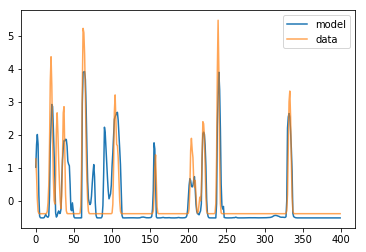

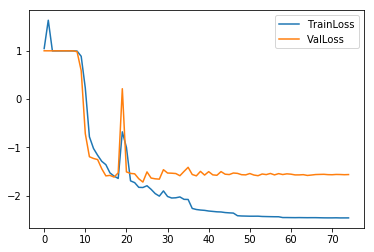




Memory Used: 4655.54 memory
Folder: scaleshift/scaleshift_0_lr0.001_l11.5e-05
Final Loss: -1.5315083903492306
Final Val: -0.9549724273383617
Final Val Acc: 0.17330580204725266
Final Test Acc: 0.4329072991012234


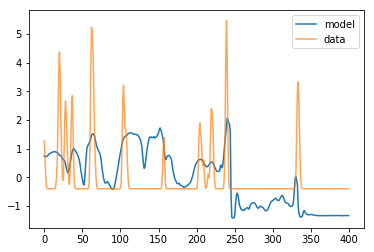

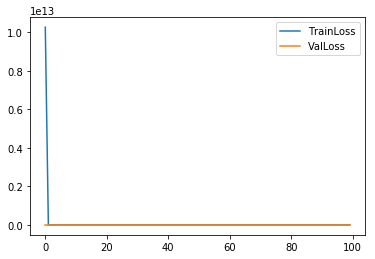




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_10_lr0.0001_l11e-06_l20.01
Final Loss: -3.199815031629882
Final Val: -1.8815754055976868
Final Val Acc: 0.24881659150123597
Final Test Acc: 0.7100849016939004


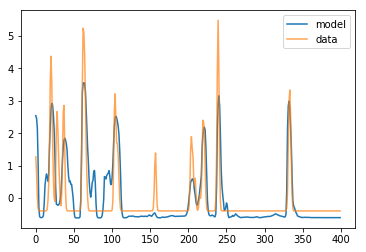

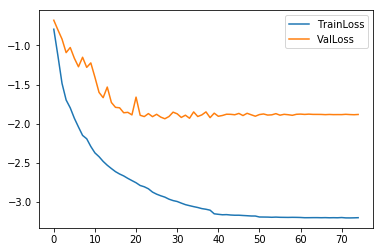




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_11_lr0.0001_l11e-06_l20.001
Final Loss: -3.6148166505459747
Final Val: -1.8523718416690826
Final Val Acc: 0.2374926656484604
Final Test Acc: 0.7093914685911121


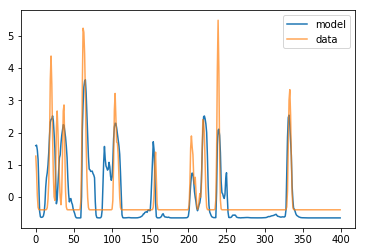

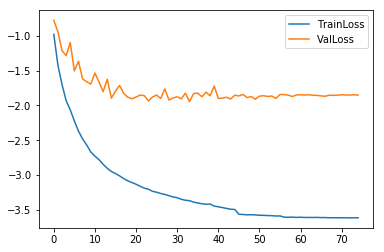




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_12_lr1e-05_l10.001_l20.01
Final Loss: -1.6647153478312458
Final Val: -1.4257049225270748
Final Val Acc: 0.22199935615062713
Final Test Acc: 0.5987121564377391


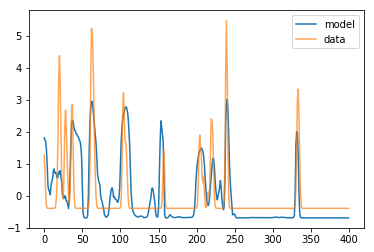

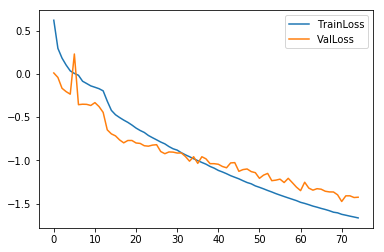




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_13_lr1e-05_l10.001_l20.001
Final Loss: -1.8354401170398316
Final Val: -1.6225657165050507
Final Val Acc: 0.22884992957115174
Final Test Acc: 0.6258389484601341


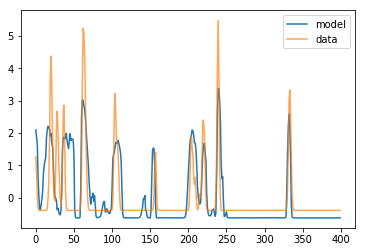

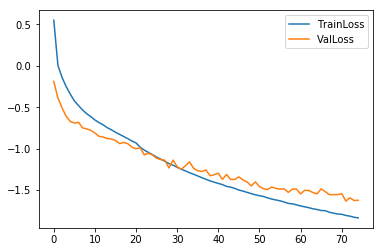




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_14_lr1e-05_l11.5e-05_l20.01
Final Loss: -2.6950158038110574
Final Val: -1.7456312030553818
Final Val Acc: 0.2268190234899521
Final Test Acc: 0.6183397125357086


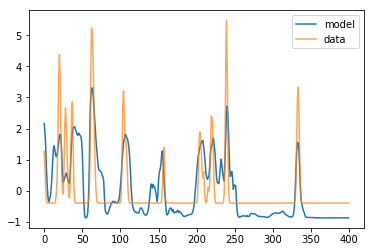

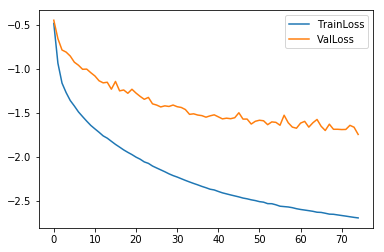




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_15_lr1e-05_l11.5e-05_l20.001
Final Loss: -2.7414672222791934
Final Val: -1.6938060894608498
Final Val Acc: 0.22175245583057404
Final Test Acc: 0.5967120554414447


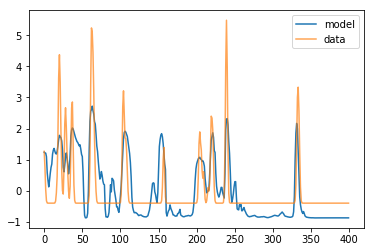

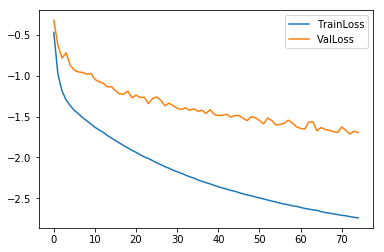




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_16_lr1e-05_l11e-06_l20.01
Final Loss: -2.6371132377226068
Final Val: -1.6377380564808846
Final Val Acc: 0.2195628136396408
Final Test Acc: 0.5944789789588277


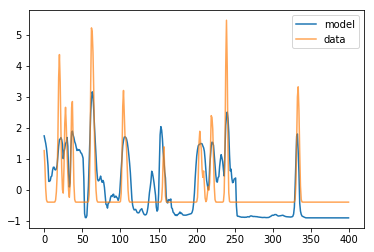

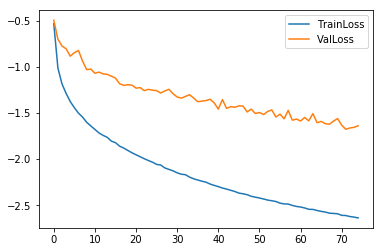




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_17_lr1e-05_l11e-06_l20.001
Final Loss: -2.7523635800247996
Final Val: -1.6626795008778572
Final Val Acc: 0.21973221004009247
Final Test Acc: 0.6117368034110647


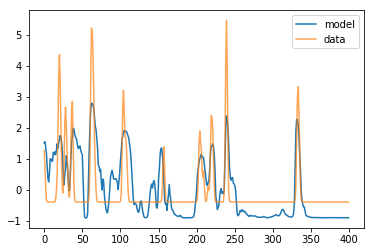

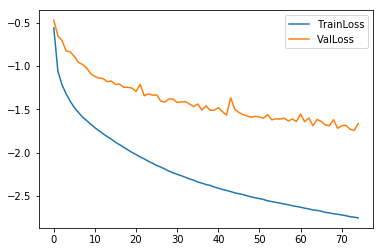




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_1_lr0.001_l10.001_l20.001
Final Loss: nan
Final Val: nan
Final Val Acc: nan
Final Test Acc: nan


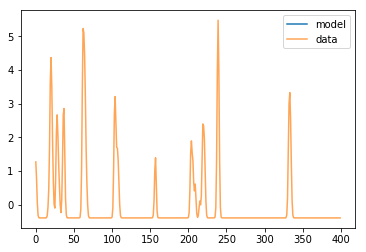

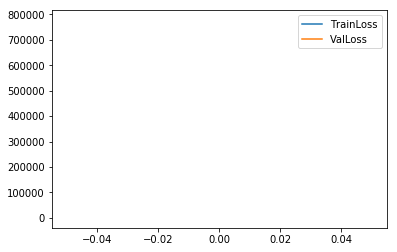




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_2_lr0.001_l11.5e-05_l20.01
Final Loss: -3.3589101181130965
Final Val: -2.0119057968258858
Final Val Acc: 0.24906306564807892
Final Test Acc: 0.7129103694778085


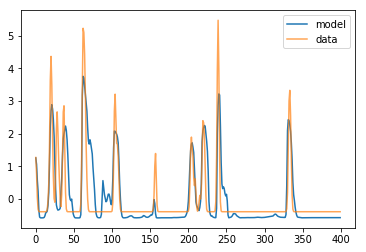

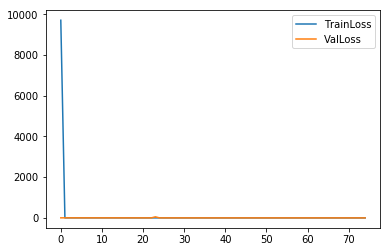




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_3_lr0.001_l11.5e-05_l20.001
Final Loss: -1.365155016528625
Final Val: -0.8190112199736177
Final Val Acc: 0.15746675282716752
Final Test Acc: 0.381065948698572


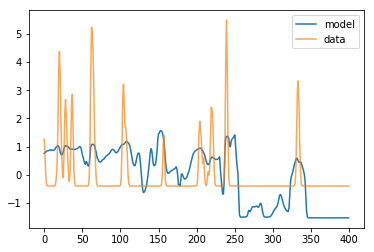

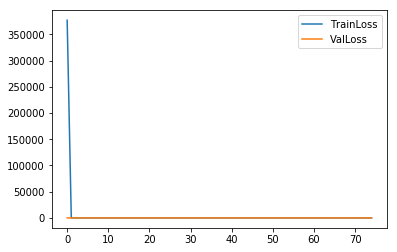




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_4_lr0.001_l11e-06_l20.01
Final Loss: -3.19163165013355
Final Val: -1.9605396911501884
Final Val Acc: 0.23814032673835756
Final Test Acc: 0.671360238095412


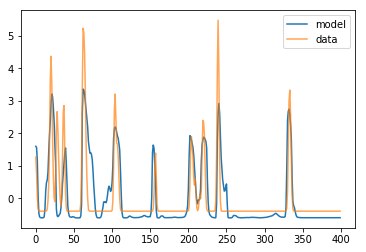

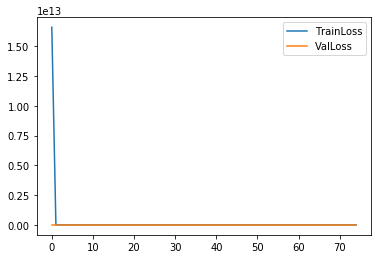




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_5_lr0.001_l11e-06_l20.001
Final Loss: -3.685817895252061
Final Val: -1.2021647151559591
Final Val Acc: 0.22027964890003204
Final Test Acc: 0.6484553236287671


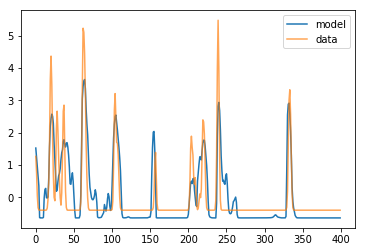

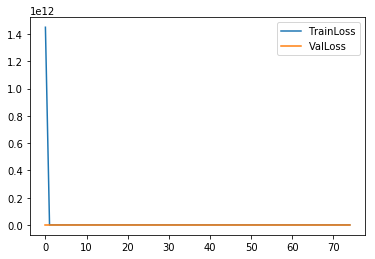




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_6_lr0.0001_l10.001_l20.01
Final Loss: -2.3792380677089433
Final Val: -1.7785890325903893
Final Val Acc: 0.25270627737045287
Final Test Acc: 0.7061486154755572


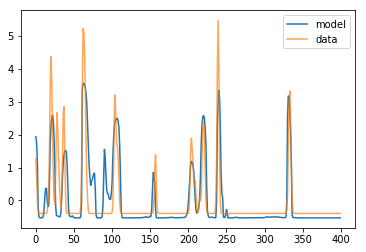

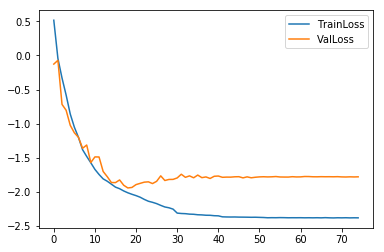




Memory Used: 6185.55 memory
Folder: scaleshift/scaleshift_7_lr0.0001_l10.001_l20.001
Final Loss: -2.617954254240292
Final Val: -1.8298200219869614
Final Val Acc: 0.2422324538230896
Final Test Acc: 0.6907018372523777


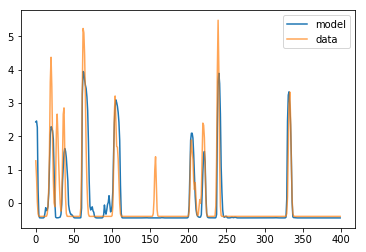

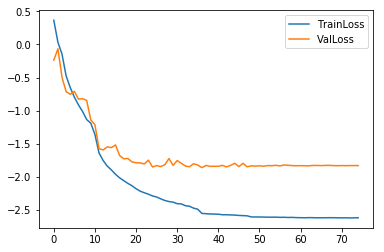




Memory Used: 6295.49 memory
Folder: scaleshift/scaleshift_8_lr0.0001_l11.5e-05_l20.01
Final Loss: -3.1212219625576587
Final Val: -1.8769338801503181
Final Val Acc: 0.24813899099826814
Final Test Acc: 0.707664003079389


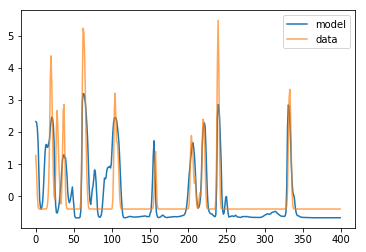

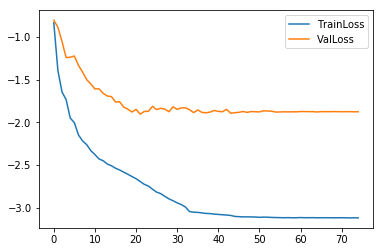




Memory Used: 6295.49 memory
Folder: scaleshift/scaleshift_9_lr0.0001_l11.5e-05_l20.001
Final Loss: -3.4941024014313298
Final Val: -1.8472004979848862
Final Val Acc: 0.2394813358783722
Final Test Acc: 0.6956264532403945


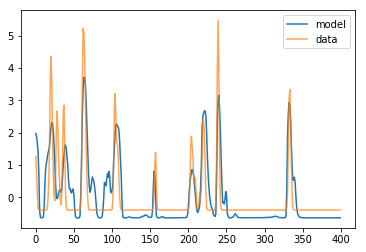

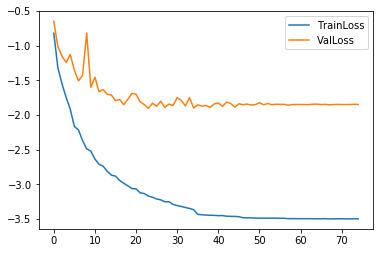




Memory Used: 6295.49 memory


In [10]:
# load the losses
n_epochs = 250
best_folder_by_loss = ""
best_loss = 100
best_folder_by_val_loss = ""
best_val_loss = 100
best_folder_by_val_acc = ""
best_val_acc = -100
best_folder_by_test_acc = ""
best_test_acc = -100

gc.collect()
max_mem_used = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
print("Memory Used: {:.2f} mb".format(max_mem_used / 1024))

for folder in sorted(model_folders):

    losses = []
    val_losses = []
    val_accs = []
    for i in range(n_epochs):
        file = "../training_scripts/"+folder+"/test_epoch_{0}.pth".format(i)
        try:
            with open(file, "rb") as fd:
                temp = torch.load(fd)
            losses.append(temp['loss'])
            val_losses.append(temp['val_loss'])
            val_accs.append(temp['val_acc'])
        except:
            break
    bn_cnn = temp['model']
    bn_cnn = bn_cnn.to(DEVICE)
    bn_cnn.eval()
    print("Folder:", folder)
    print("Final Loss:", losses[-1])
    print("Final Val:", val_losses[-1])
    print("Final Val Acc:", val_accs[-1])
    model_response = bc.batch_compute_model_response(test_data.X, bn_cnn, 500)    
    mu = np.mean([scipy.stats.pearsonr(model_response['output'][:, i], test_data.y[:, i])[0] for i in range(len(cells))])
    print("Final Test Acc:", mu)
    with open("../training_scripts/"+folder+"/hyperparams.txt", 'a') as f:
        f.write("\nTest Ganglion Cell Correlation: " + str(mu))
    if losses[-1] < best_loss:
        best_loss = losses[-1]
        best_folder_by_loss = folder
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        best_folder_by_val_loss = folder
    if val_accs[-1] > best_val_acc:
        best_val_acc = val_accs[-1]
        best_folder_by_val_acc = folder
    if mu > best_test_acc:
        best_test_acc = mu
        best_folder_by_test_acc = folder
    plt.plot(normalize(model_response['output'][:400, 0]))
    plt.plot(normalize(test_data.y[:400,0]), alpha=.7)
    plt.legend(["model", "data"])
    plt.show()
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(["TrainLoss", "ValLoss"])
    plt.show()
    print("\n\n")
#     gc.collect()
#     max_mem_used = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
#     print("Memory Used: {:.2f} memory".format(max_mem_used / 1024))

In [12]:
print("Best by validation loss:", best_folder_by_val_loss)
print("Best by training loss:", best_folder_by_loss)
print("Best by val accuracy:", best_folder_by_val_acc)
print("Best by test accuracy:", best_folder_by_test_acc)

Best by validation loss: scaleshift/scaleshift_2_lr0.001_l11.5e-05_l20.01
Best by training loss: scaleshift/scaleshift_5_lr0.001_l11e-06_l20.001
Best by val accuracy: scaleshift/scaleshift_6_lr0.0001_l10.001_l20.01
Best by test accuracy: scaleshift/scaleshift_2_lr0.001_l11.5e-05_l20.01


In [13]:
folder = best_folder_by_test_acc
for i in range(n_epochs):
    file = "../training_scripts/"+folder+"/test_epoch_{0}.pth".format(i)
    try:
        with open(file, "rb") as fd:
            temp = torch.load(fd)
    except:
        file = "../training_scripts/"+folder+"/test_epoch_{0}.pth".format(i-1)
        with open(file, "rb") as fd:
            temp = torch.load(fd)
        print("Used model file:", file)
        break

Used model file: ../training_scripts/scaleshift/scaleshift_2_lr0.001_l11.5e-05_l20.01/test_epoch_74.pth


In [14]:
bn_cnn = temp['model']
bn_cnn = bn_cnn.to(DEVICE)
bn_cnn.eval()

SSCNN(
  (sequential): Sequential(
    (0): Conv2d(40, 8, kernel_size=(15, 15), stride=(1, 1))
    (1): ScaleShift(shape=(8, 36, 36), scale=True, shift=True)
    (2): GaussianNoise(std=0.05)
    (3): ReLU()
    (4): Conv2d(8, 8, kernel_size=(11, 11), stride=(1, 1))
    (5): ScaleShift(shape=(8, 26, 26), scale=True, shift=True)
    (6): GaussianNoise(std=0.05)
    (7): ReLU()
    (8): Flatten()
    (9): Linear(in_features=5408, out_features=5, bias=True)
    (10): ScaleShift(shape=5, scale=True, shift=True)
    (11): Softplus(beta=1, threshold=20)
  )
)

In [15]:
model_response = bc.batch_compute_model_response(test_data.X, bn_cnn, 500)

In [16]:
model_response.keys()

dict_keys(['sequential.0', 'sequential.1', 'sequential.2', 'sequential.3', 'sequential.4', 'sequential.5', 'sequential.6', 'sequential.7', 'sequential.8', 'sequential.9', 'sequential.10', 'sequential.11', 'sequential', '', 'output'])

In [17]:
conv_layers = ['sequential.0', 'sequential.6']

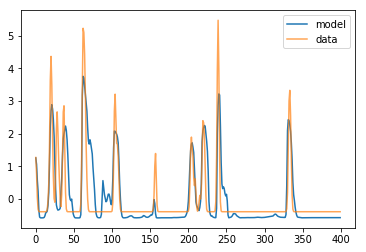

In [18]:
plt.plot(normalize(model_response['output'][:400, 0]))
plt.plot(normalize(test_data.y[:400,0]), alpha=.7)
plt.legend(["model", "data"])

In [23]:
# average retinal ganglion cell correlation
mu = np.mean([scipy.stats.pearsonr(model_response['output'][:, i], test_data.y[:, i])[0] for i in range(len(cells))])
print("Average correlation:", mu)

Average correlation: 0.7129103694778085


# Retinal Phenomena

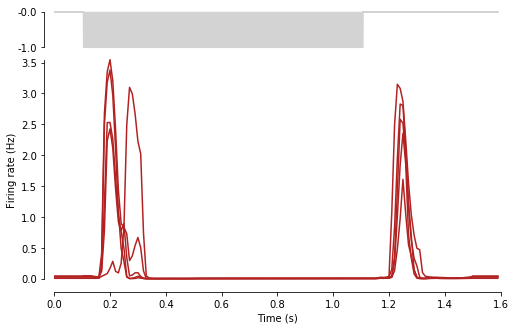

In [24]:
figs, X, resp= rp.step_response(bn_cnn)

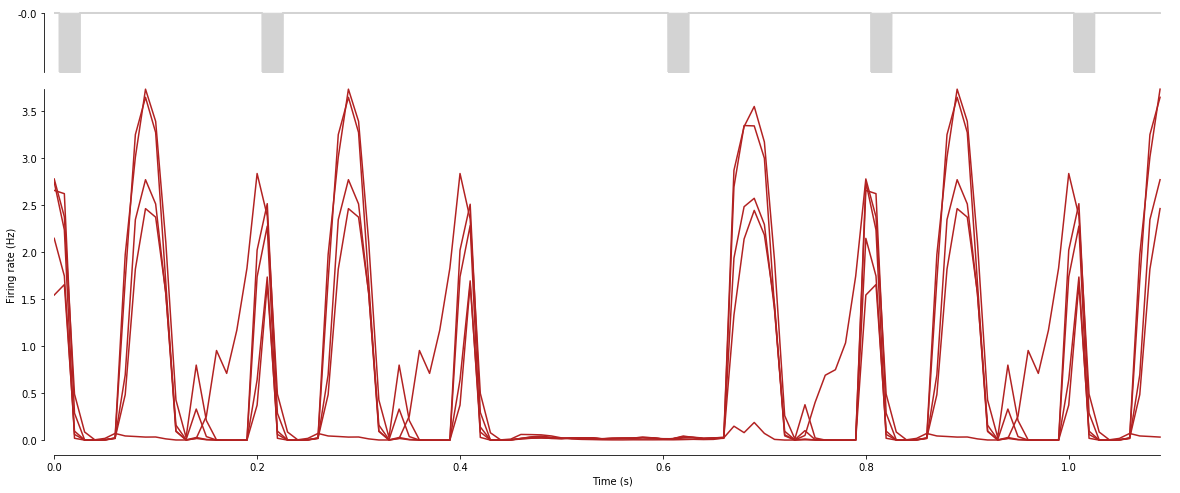

In [25]:
figs, X, resp = rp.osr(bn_cnn)

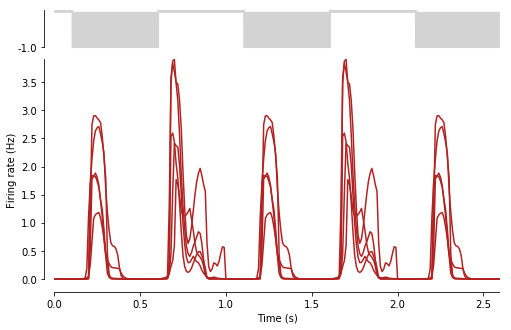

In [26]:
figs, X, resp = rp.reversing_grating(bn_cnn)

100%|██████████| 10/10 [00:00<00:00, 65.91it/s]


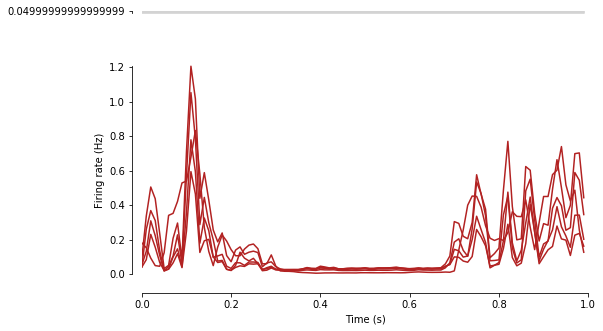

In [27]:
figs, X, resp = rp.contrast_adaptation(bn_cnn, .35, .05)

51it [00:00, 152.02it/s]


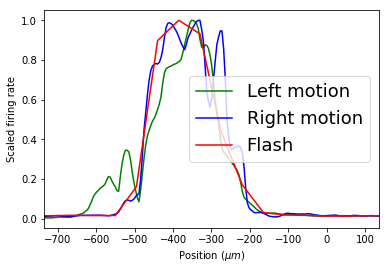

In [28]:
(fig, ax), (speed_left, speed_right), (c_right, stim_right, resp_right), (c_left, stim_left, resp_left), (flash_centers, flash_responses) = rp.motion_anticipation(bn_cnn)

# Intracellular Stuff

In [29]:
#If you want to use stimulus that isnt just boxes
def prepare_stim(stimuli, stim_type):
    if stim_type == 'boxes':
        return stimuli
    elif stim_type == 'flashes':
        stim = stimuli.reshape(stimuli.shape[0], 1, 1)
        return np.broadcast_to(stim, (stim.shape[0], 38, 38))
    elif stim_type == 'movingbar':
        stim = block_reduce(stimuli, (1,6), func=np.mean)
        stim = pyret.stimulustools.upsample(stim.reshape(stim.shape[0], stim.shape[1], 1), 5)[0]
        return np.broadcast_to(stim, (stim.shape[0], stim.shape[1], stim.shape[1]))
    else:
        return None

In [30]:
#Load data
# num_pots stores the number of cells per stimulus
# mem_pots stores the membrane potential
# psst, you can find the "data" folder in /home/grantsrb on deepserver
# psssst, note the additional ../ added to each path in files

files = ['../data/bipolars_late_2012.h5', '../data/bipolars_early_2012.h5', '../data/amacrines_early_2012.h5', '../data/amacrines_late_2012.h5', '../data/horizontals_early_2012.h5', '../data/horizontals_late_2012.h5']
files = ["../" + name for name in files]
file_ids = []
for f in files:
    file_ids.append(re.split('_|\.', f)[0])
filter_length = 40
window_size = 2
stims = []
mem_pots = []
num_pots = []
for fi in files:
    with h5.File(fi, 'r') as f:
        num = np.array(f['boxes/detrended_membrane_potential'].shape[0])
        num_pots.append(num)
        stims.append(prepare_stim(np.array(f['boxes/stimuli']), 'boxes'))
        mem_pots.append(np.array(f['boxes/detrended_membrane_potential'])[:, filter_length:])

In [31]:
# Computes the model responses for each stimulus 
# and interneuron type labels y_true (0 for bipolar, 1 for amacrine, 2 for horizontal)
y_true = []
filter_length = 40
model_responses = []
for i in range(len(files)):
    file_name = files[i]
    if 'bipolar' in file_name:
        for j in range(num_pots[i]):
            y_true.append(0)
    elif 'amacrine' in file_name:
        for j in range(num_pots[i]):
            y_true.append(1)
    else:
        for j in range(num_pots[i]):
            y_true.append(2)
    stim = stims[i]
    padded_stim = intracellular.pad_to_edge(scipy.stats.zscore(stim))
    model_responses.append(bc.batch_compute_model_response(stimuli.concat(padded_stim),bn_cnn,  500))

In [32]:
# uses classify to get the most correlated cell/layer/subtype for each interneuron recording. Stored in all_cell_info
# y_pred does a baseline "classification": record the convolutional layer that the most correlated cell is in.
# See intracellular.py for more info
# This takes a really long time to run. 
all_cell_info = []
y_pred = []
for i in tqdm(range(len(files))):
    for j in range(mem_pots[i].shape[0]):
        model_response = model_responses[i]
        stim = stims[i]
        potential = mem_pots[i][j]
        cell_info = intracellular.classify(potential, model_response, stim.shape[0], layer_keys=conv_layers)
        all_cell_info.append(cell_info)
        layer = cell_info[0]
        if layer == conv_layers[0]:
            y_pred.append(0)
        else:
            y_pred.append(1)

100%|██████████| 6/6 [13:31<00:00, 136.28s/it]


Layer 0 correlation map


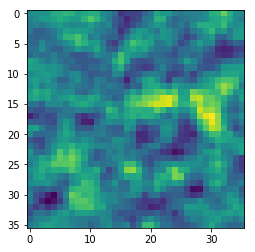

Layer 1 correlation map


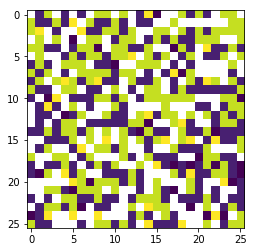

In [33]:
# Make correlation maps
model_response = model_responses[3]
potential = mem_pots[3][4]
print("Layer 0 correlation map")
plt.imshow(intracellular.correlation_map(potential, model_response[conv_layers[0]][:, 4]))
plt.show()
print("Layer 1 correlation map")
plt.imshow(intracellular.correlation_map(potential, model_response[conv_layers[1]][:, 4]))
plt.show()

In [34]:
# Average intracellular correlation. RIP.
print("Mean intercellular:", np.mean([all_cell_info[i][3] for i in range(7)]))
print("Std intercellular:", np.std([all_cell_info[i][3] for i in range(7)]))
print("Min intercellular:", np.min([all_cell_info[i][3] for i in range(7)]))
print("Max intercellular:", np.max([all_cell_info[i][3] for i in range(7)]))

Mean intercellular: 0.1604873142498368
Std intercellular: 0.037509831015245
Min intercellular: 0.08768307815854848
Max intercellular: 0.08768307815854848


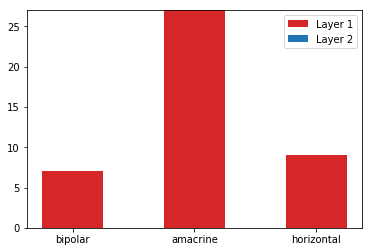

In [35]:
bipolar_layer1 = 0
bipolar_layer2 = 0
amacrine_layer1 = 0
amacrine_layer2 = 0
horizontal_layer1 = 0
horizontal_layer2 = 0
for index in range(len(y_true)):
    if y_true[index] == 0 and y_pred[index] == 0:
        bipolar_layer1 += 1
    elif y_true[index] == 0 and y_pred[index] == 1:
        bipolar_layer2 += 1
    elif y_true[index] == 1 and y_pred[index] == 0:
        amacrine_layer1 += 1
    elif y_true[index] == 1 and y_pred[index] == 1:
        amacrine_layer2 += 1
    elif y_true[index] == 2 and y_pred[index] == 0:
        horizontal_layer1 += 1
    else:
        horizontal_layer2 += 1
    
layer1 = [bipolar_layer1, amacrine_layer1, horizontal_layer1]
layer2 = [bipolar_layer2, amacrine_layer2, horizontal_layer2]
ind = np.arange(3)
width = 0.5
p1 = plt.bar(ind, layer1, width, color='#d62728')
p2 = plt.bar(ind, layer2, width, bottom=layer1)
plt.xticks(ind, ('bipolar', 'amacrine', 'horizontal'))
plt.legend((p1[0], p2[0]), ('Layer 1', 'Layer 2'))
plt.show()

In [36]:
stimulus_num = 3
model_cell_response = model_responses[stimulus_num][conv_layers[1]][:, 1, 15, 0]
stimulus = stims[3]

In [37]:
filter_length = 40

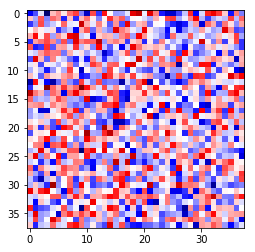

In [38]:
# Plot the receptive field for a model cell
rc_model, lags_model = ft.revcorr(scipy.stats.zscore(stimulus)[filter_length:], model_cell_response, nsamples_before=0, nsamples_after=filter_length)
spatial_model, temporal_model = ft.decompose(rc_model)
img =plt.imshow(spatial_model, cmap = 'seismic', clim=[-np.max(abs(spatial_model)), np.max(abs(spatial_model))])

In [39]:
stimulus_num = 3
model_cell_response = model_responses[stimulus_num][conv_layers[0]][:, 1, 15, 0]
stimulus = stims[3]

In [40]:
filter_length = 40

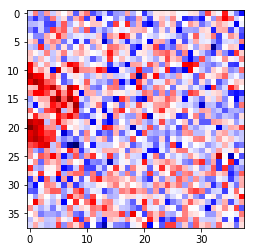

In [41]:
# Plot the receptive field for a model cell
rc_model, lags_model = ft.revcorr(scipy.stats.zscore(stimulus)[filter_length:], model_cell_response, nsamples_before=0, nsamples_after=filter_length)
spatial_model, temporal_model = ft.decompose(rc_model)
img =plt.imshow(spatial_model, cmap = 'seismic', clim=[-np.max(abs(spatial_model)), np.max(abs(spatial_model))])